In [45]:
from pathlib import Path
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image

class Dataset(Dataset):
    def __init__(self, folder, image_size, exts = ['jpg', 'jpeg', 'png']):
        super().__init__()
        self.folder = folder
        self.image_size = image_size
        self.paths = [p for ext in exts for p in Path(f'{folder}').glob(f'**/*.{ext}')]
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Lambda(lambda x: x * 2 - 1)
        ])
    def __len__(self):
        return len(self.paths)
    def __getitem__(self, index):
        path = self.paths[index]
        img = Image.open(path)
        return self.transform(img)

dataset = Dataset('/data/image/images256x256', 256)
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)

In [46]:
for batch in train_loader:
    print(batch.shape)
    break

torch.Size([4, 3, 256, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


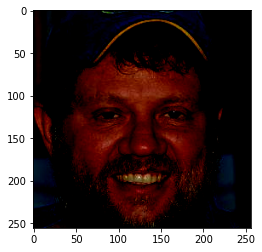

In [41]:
import matplotlib.pyplot as plt
plt.imshow(dataset[1].permute(1, 2, 0))
plt.show()

In [42]:
batch.min()

tensor(-1.)

In [43]:
batch.max()

tensor(1.)